In [1]:
!nvidia-smi

Sat Feb 27 01:29:15 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.57       Driver Version: 450.57       CUDA Version: 11.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  GeForce RTX 208...  Off  | 00000000:18:00.0 Off |                  N/A |
| 28%   38C    P8    13W / 250W |    238MiB / 11016MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import wandb
import random
import os
import collections
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
os.getcwd()

'/tf/liao'

In [4]:
training_path = []
training_labels = []
val_path = []
val_labels = []
testing_path = []
testing_labels = []

classes = ['NORMAL','PNEUMONIA']
for c in classes:  
    for dirpath, dnames, fnames in os.walk("./chest_xray/train/" + c):
        for f in fnames:
            training_path.append("./chest_xray/train/" + c + "/" + f)
            training_labels.append(c)
for c in classes:  
    for dirpath, dnames, fnames in os.walk("./chest_xray/val/" + c):
        for f in fnames:
            val_path.append("./chest_xray/val/" + c + "/" + f)
            val_labels.append(c)
for c in classes:  
    for dirpath, dnames, fnames in os.walk("./chest_xray/test/" + c):
        for f in fnames:
            testing_path.append("./chest_xray/test/" + c + "/" + f)
            testing_labels.append(c)
dt = list(zip(training_path, training_labels))
random.shuffle(dt)
training_path, training_labels = zip(*dt)
training_labels = list(training_labels)
collections.Counter(training_labels)

Counter({'PNEUMONIA': 3875, 'NORMAL': 1341})

In [5]:
print("training data : #{:0}, validation data #{:0}, testing data #{:0}".format(len(training_labels), len(val_labels), len(testing_labels)))

training data : #5216, validation data #16, testing data #624


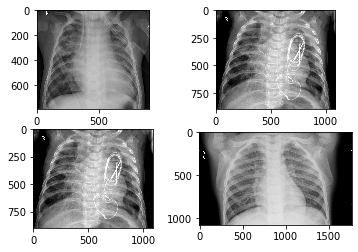

In [6]:
fig, axs = plt.subplots(2,2)
for i in range(2):
    for j in range(2):
        axs[i, j].imshow(tf.image.decode_jpeg(tf.io.read_file(training_path[i+j]), channels=3))
# diff shape
# diff part 

In [7]:
IMAGE_SIZE_CROPPED = 200
IMAGE_HEIGHT, IMAGE_WIDTH, IMAGE_DEPTH = 224,224,3

In [8]:
# check min shape
shape_inf = []
for data_path in training_path:
    shape_inf.append(min(tf.shape(tf.image.decode_jpeg(tf.io.read_file(data_path), channels=IMAGE_DEPTH))[:-1]))

In [9]:
print(np.sort(shape_inf))
print(tf.argmin(shape_inf).numpy())
print("number of pic shape under 224 : {}".format(sum(np.array(shape_inf)<224.)))

[ 127  132  138 ... 2583 2619 2625]
2786
number of pic shape under 224 : 41


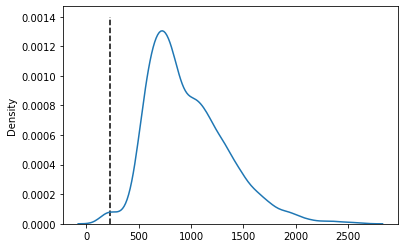

In [10]:
sns.kdeplot(np.array(shape_inf))
plt.vlines(224, ymin = 0, ymax = 0.0014, linestyles = "dashed")

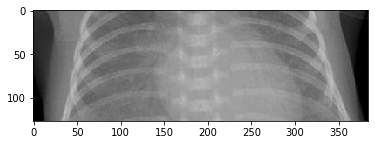

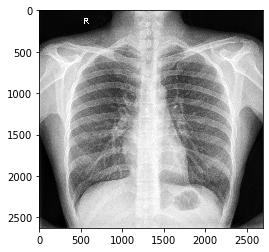

In [11]:
plt.imshow(tf.image.decode_jpeg(tf.io.read_file(training_path[tf.argmin(shape_inf)]), channels=3))
plt.show()
plt.imshow(tf.image.decode_jpeg(tf.io.read_file(training_path[tf.argmax(shape_inf)]), channels=3))
plt.show()

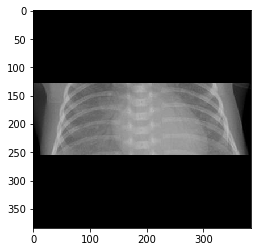

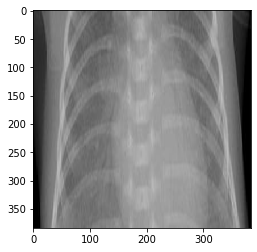

In [12]:
# resize padding vs resize
tmp = tf.image.decode_jpeg(tf.io.read_file(training_path[tf.argmin(shape_inf)]), channels=3)
plt.imshow(tf.cast(tf.image.resize_with_pad(tmp, np.max(tf.shape(tf.image.decode_jpeg(tf.io.read_file(training_path[tf.argmin(shape_inf)])))), np.max(tf.shape(tf.image.decode_jpeg(tf.io.read_file(training_path[tf.argmin(shape_inf)]))))), tf.uint8))
plt.show()

plt.imshow(tf.cast(tf.image.resize(tmp, [np.max(tf.shape(tf.image.decode_jpeg(tf.io.read_file(training_path[tf.argmin(shape_inf)])))), np.max(tf.shape(tf.image.decode_jpeg(tf.io.read_file(training_path[tf.argmin(shape_inf)]))))]), tf.uint8))
plt.show()

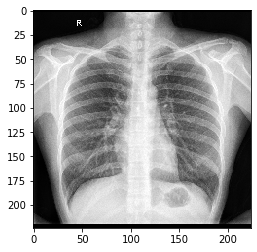

In [18]:
plt.imshow(tf.cast(tf.image.resize_with_pad(tf.image.decode_jpeg(tf.io.read_file(training_path[tf.argmax(shape_inf)]), channels=3), 224,224), tf.uint8))